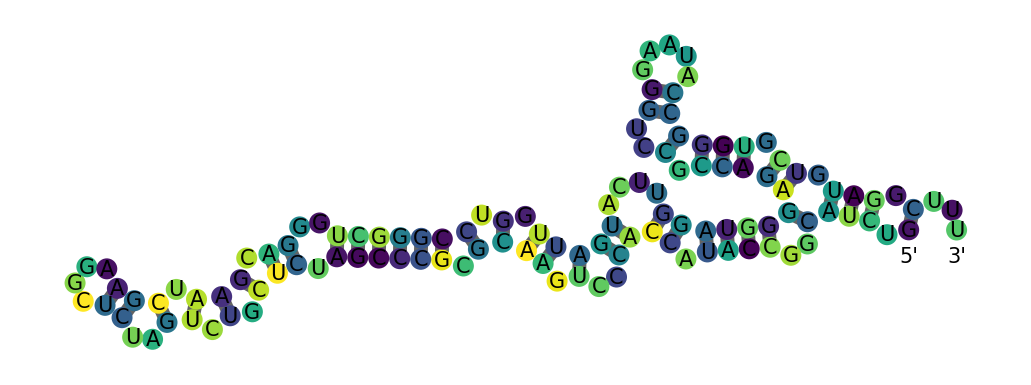

In [24]:
import subprocess
import matplotlib.pyplot as plt
from ipynb.draw import draw_struct
import numpy as np

def run_cpp_program(input_text):
    compile_process = subprocess.Popen(["g++", "rna.cpp", "-o", "output"], stderr=subprocess.PIPE)
    _, compile_error = compile_process.communicate()
    if compile_process.returncode != 0:
        print(f"Compilation Error: {compile_error.decode('utf-8')}")
        return None
    run_process = subprocess.Popen(["./output"], stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    program_output, program_error = run_process.communicate(input=input_text.encode('utf-8'))
    if run_process.returncode != 0:
        print(f"Program Error: {program_error.decode('utf-8')}")
        return None

    return program_output.decode('utf-8')

seq = 'GUCUACGGCCAUACCACCCUGAACGCGCCCGAUCUCGUCUGAUCUCGGAAGCUAAGCAGGGUCGGGCCUGGUUAGUACUUGGAUGGGAGACCGCCUGGGAAUACCGGGUGCUGUAGGCUUU'
struct = run_cpp_program(seq).strip()
# if output is not None:
#     print("Program Output:")
#     print(output)
draw_struct(seq, struct, c = np.random.uniform(size=len(seq)))